Project Overview:  Exploratory Data Analysis (EDA) & Visualization of NVIDIA Stock Prices

1. Beginner Level: Exploratory Data Analysis (EDA) & Visualization
Skills:

Data loading and cleaning
Data visualization
Basic statistical analysis
Tasks:

Load the dataset into a pandas DataFrame.
Clean the data: Handle missing values, remove duplicates, and check for inconsistencies.
Explore the dataset: Calculate summary statistics (mean, median, standard deviation) for the stock prices.
Visualize the data:
Plot the historical stock price over time.
Plot moving averages (e.g., 7-day, 30-day) on top of the stock price for trend analysis.
Create histograms to show the distribution of stock price returns.
Correlation analysis: Check for correlations between different stocks or other variables (e.g., volume).

Deliverables:

A Jupyter notebook with visualizations (e.g., line plots, histograms) and basic analysis.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

In [33]:
df = pd.read_csv('datasets/nvidia_stock_data_2024.csv')

In [34]:
df.shape

(6509, 7)

In [35]:
df.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-22,0.043750,0.048828,0.038802,0.041016,0.017325,2714688000
1,1999-01-25,0.044271,0.045833,0.041016,0.045313,0.019140,510480000
2,1999-01-26,0.045833,0.046745,0.041146,0.041797,0.017655,343200000
3,1999-01-27,0.041927,0.042969,0.039583,0.041667,0.017600,244368000
4,1999-01-28,0.041667,0.041927,0.041276,0.041536,0.017544,227520000
5,1999-01-29,0.041536,0.041667,0.039583,0.039583,0.016720,244032000
6,1999-02-01,0.039583,0.040625,0.039583,0.040365,0.017050,154704000
7,1999-02-02,0.039583,0.040625,0.036068,0.037240,0.015730,264096000
8,1999-02-03,0.036719,0.038542,0.036458,0.038021,0.016060,75120000
9,1999-02-04,0.038542,0.041146,0.038021,0.040104,0.016940,181920000


In [36]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [37]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6509.000000,6509.000000,6509.000000,6509.000000,6509.000000,6.509000e+03
mean,7.846563,7.989922,7.689917,7.846531,7.679767,6.017739e+08
std,21.342285,21.722479,20.897965,21.325616,21.373121,4.311185e+08
min,0.034896,0.035547,0.033333,0.034115,0.014410,1.968000e+07
25%,0.279427,0.287250,0.272250,0.279250,0.117953,3.413160e+08
50%,0.462750,0.469500,0.456250,0.463000,0.212784,5.033400e+08
75%,4.450750,4.514500,4.378250,4.466500,4.219250,7.326760e+08
max,149.350006,152.889999,146.259995,148.880005,148.880005,9.230856e+09


In [38]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6509 entries, 0 to 6508
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6509 non-null   object 
 1   Open       6509 non-null   float64
 2   High       6509 non-null   float64
 3   Low        6509 non-null   float64
 4   Close      6509 non-null   float64
 5   Adj Close  6509 non-null   float64
 6   Volume     6509 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 356.1+ KB


Clean Data

In [39]:
df.isnull().sum()
# no null values detected
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
# no duplicates detected

Number of duplicate rows: 0


In [40]:
df.columns = ['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume']

Detect and remove outliers

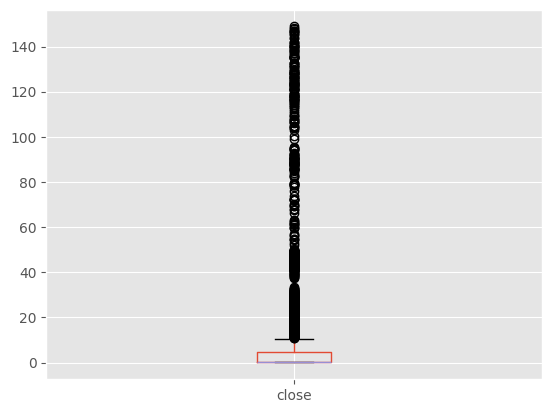

In [41]:
df[['close']].boxplot()
plt.show()

In [43]:
q1 = df['close'].quantile(0.25)
q3 = df['close'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[(df['close'] >= lower_bound) & (df['close'] <= upper_bound)]


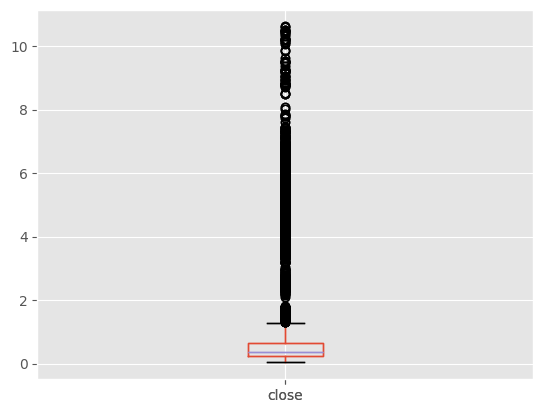

In [45]:
df[['close']].boxplot()
plt.show()

In [48]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [49]:
invalid_prices = df[df['close'] < 0]
print(f"Invalid prices: {invalid_prices}")

Invalid prices: Empty DataFrame
Columns: [open, high, low, close, adj_close, volume]
Index: []


In [50]:
df['daily_return'] = df['close'].pct_change()
df['7_day_ma'] = df['close'].rolling(window=7).mean()

In [54]:
df.to_csv('quant/data/nvidia_stock_data_2024_cleaned.csv', index=True)

In [57]:
df.head(20)

,open,high,low,close,adj_close,volume,daily_return,7_day_ma
date,,,,,,,,
1999-01-22,0.043750,0.048828,0.038802,0.041016,0.017325,2714688000,NaN,NaN
1999-01-25,0.044271,0.045833,0.041016,0.045313,0.019140,510480000,0.104764,NaN
1999-01-26,0.045833,0.046745,0.041146,0.041797,0.017655,343200000,-0.077594,NaN
1999-01-27,0.041927,0.042969,0.039583,0.041667,0.017600,244368000,-0.003110,NaN
1999-01-28,0.041667,0.041927,0.041276,0.041536,0.017544,227520000,-0.003144,NaN
1999-01-29,0.041536,0.041667,0.039583,0.039583,0.016720,244032000,-0.047019,NaN
1999-02-01,0.039583,0.040625,0.039583,0.040365,0.017050,154704000,0.019756,0.041611
1999-02-02,0.039583,0.040625,0.036068,0.037240,0.015730,264096000,-0.077419,0.041072
1999-02-03,0.036719,0.038542,0.036458,0.038021,0.016060,75120000,0.020972,0.040030
